<a href="https://colab.research.google.com/github/Dev-Faldu/Image-Processing-/blob/main/Image_Proccesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless pillow matplotlib


In [2]:
from google.colab import files
uploaded = files.upload()
image_path = next(iter(uploaded))


Saving Screenshot 2025-06-05 115925.png to Screenshot 2025-06-05 115925.png


In [3]:
import cv2
import numpy as np
from PIL import Image, ImageFilter, ImageOps
import matplotlib.pyplot as plt

def show_images(original, processed, title="Processed Image"):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].imshow(original)
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    axs[1].imshow(processed, cmap='gray' if len(processed.shape)==2 else None)
    axs[1].set_title(title)
    axs[1].axis('off')
    plt.tight_layout()
    plt.show()

def process_image(image_path, option="grayscale", params=None):
    if params is None:
        params = {}

    img = Image.open(image_path).convert("RGB")
    original = np.array(img)

    if option == "grayscale":
        processed = ImageOps.grayscale(img)

    elif option == "invert":
        processed = ImageOps.invert(img)

    elif option == "resize":
        width = params.get("width", 800)
        height = params.get("height", 600)
        processed = img.resize((width, height))

    elif option == "blur":
        sigma = params.get("sigma", 2)
        processed = img.filter(ImageFilter.GaussianBlur(radius=sigma))

    elif option == "sharpen":
        amount = params.get("sigma", 1)
        sharpen_kernel = np.array([[0, -amount, 0],
                                   [-amount, 1 + 4 * amount, -amount],
                                   [0, -amount, 0]])
        img_array = np.array(img)
        processed = cv2.filter2D(img_array, -1, sharpen_kernel)

    elif option == "edge":
        gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        magnitude = cv2.magnitude(sobelx, sobely)
        _, edge_img = cv2.threshold(magnitude, 50, 255, cv2.THRESH_BINARY)
        processed = edge_img.astype(np.uint8)

    else:
        raise ValueError("Unsupported processing option.")

    show_images(original, np.array(processed), title=option.capitalize())


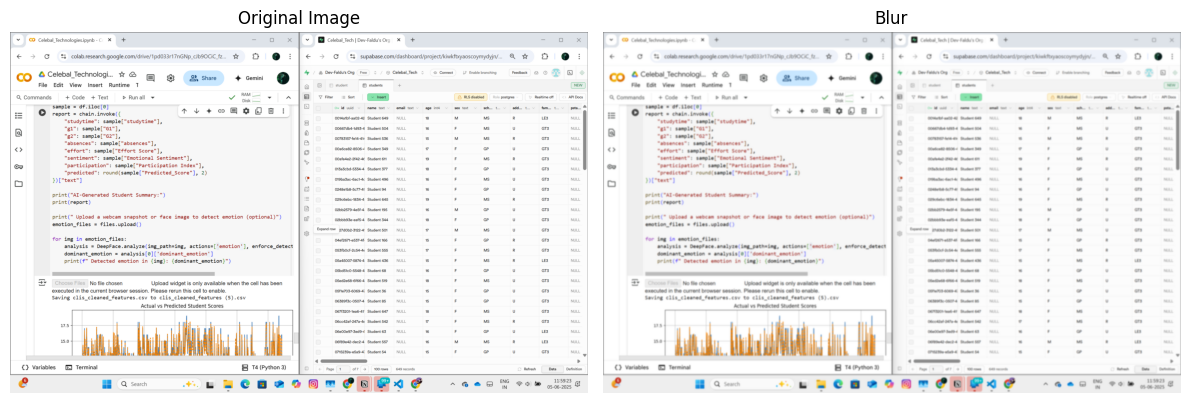

In [4]:
process_image(image_path, option="blur", params={"sigma": 2})


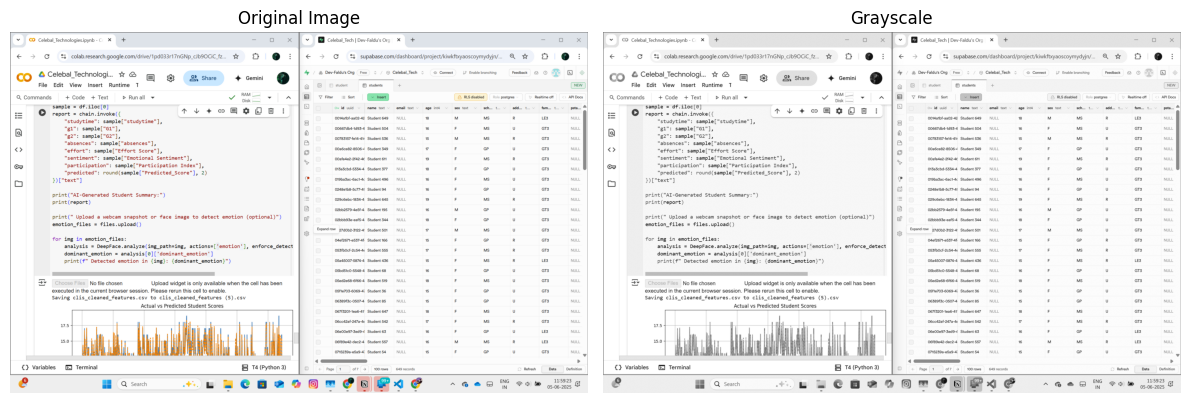

In [5]:
process_image(image_path, option="grayscale")

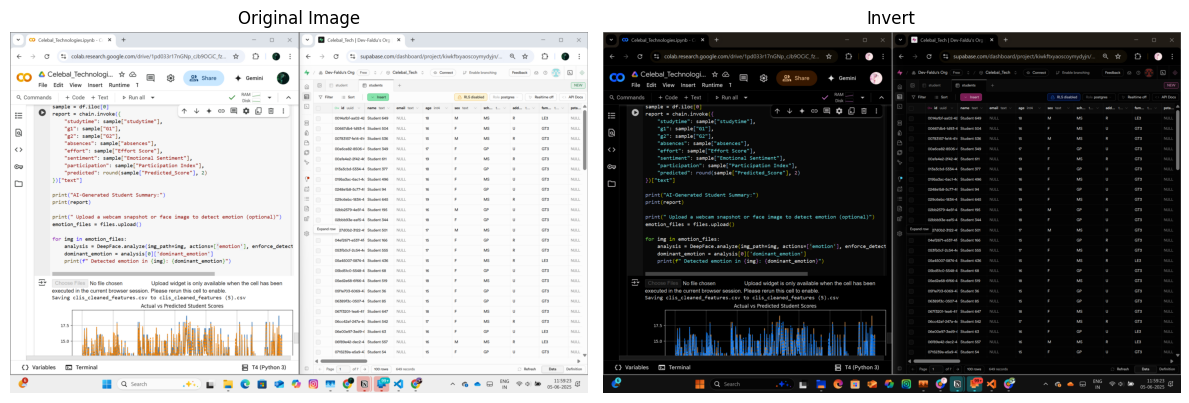

In [6]:
process_image(image_path, option="invert")

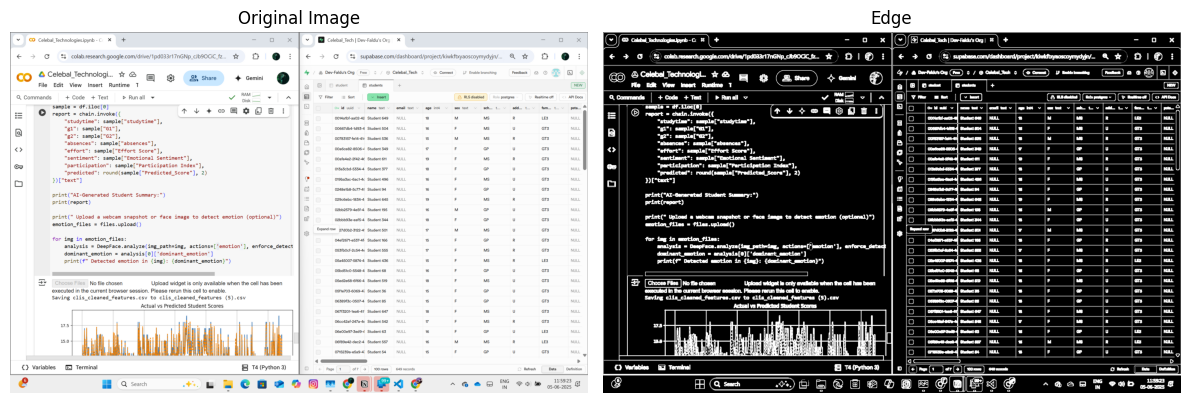

In [7]:
process_image(image_path, option="edge")

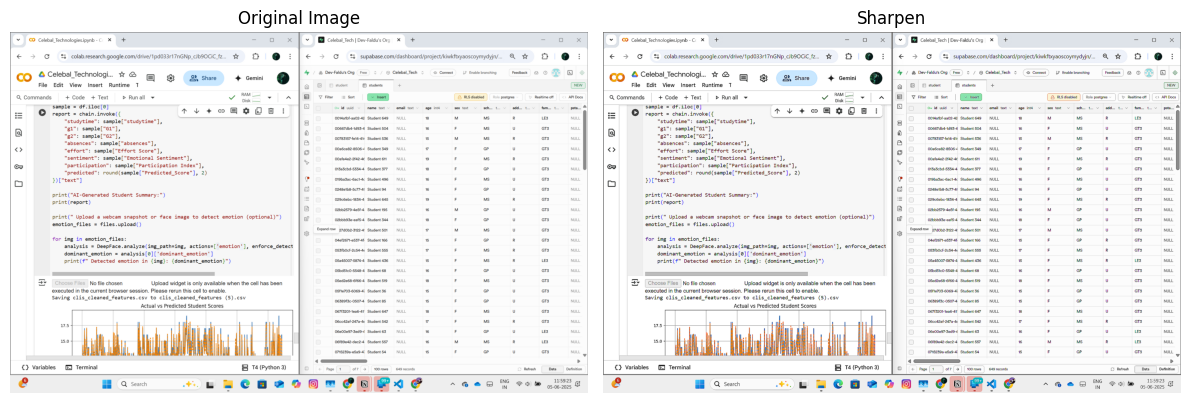

In [8]:
process_image(image_path, option="sharpen", params={"sigma": 1})


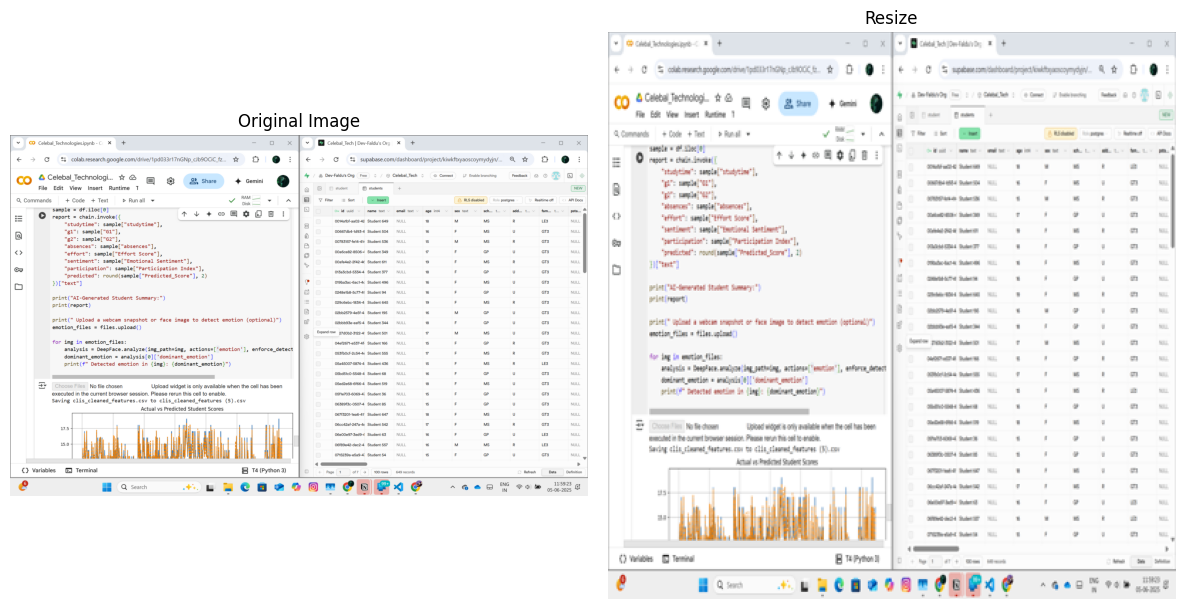

In [9]:
process_image(image_path, option="resize", params={"width": 400, "height": 400})